In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, MaxNLocator

In [2]:
# The KL divergence of bernoulli distribution
def berno_kl_div(p,q):
    return (1-p)*np.log((1-p)/(1-q)) + p * np.log(p/q)

In [3]:
p = 0.5
delta_list = np.arange(0, 0.3+1e-3, 0.05)
n = 4
m_list = np.arange(0, 20, 0.1)

In [4]:
div_list = []
for delta in delta_list:
    div_delta = []
    for m in m_list:
        div_delta.append(berno_kl_div(p, p+delta))
    div_list.append(div_delta)
div_list = np.array(div_list)

Text(0.5, 1.0, '$p = 0.5, q = p + \\Delta$')

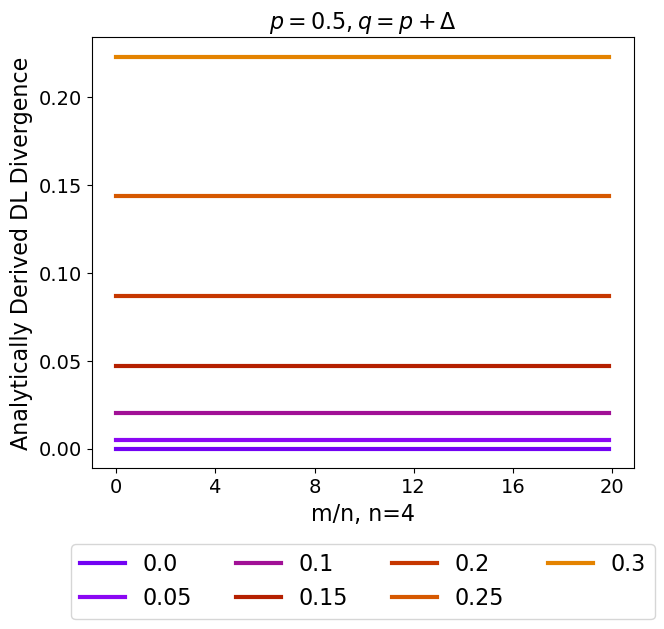

In [14]:
fontsize = 16
labelsize = 14
fig, ax = plt.subplots(figsize = (7,7))
cmap = [plt.cm.gnuplot(i) for i in np.linspace(0.2, 0.8, len(delta_list))]
for i, delta in enumerate(delta_list):
    ax.plot(m_list, div_list[i], c=cmap[i], lw=3, label=str(np.round(delta,2)))
ax.set_ylabel("Analytically Derived DL Divergence", fontsize = fontsize)
ax.set_xlabel("m/n, n=4", fontsize = fontsize)
ax.tick_params(axis='x', labelsize=labelsize)
ax.tick_params(axis='y', labelsize=labelsize)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.2,
                 box.width, box.height * 0.8])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, fontsize=fontsize, ncol=4)
ax.xaxis.set_major_locator(MaxNLocator(6))
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.set_title(r"$p = {}, q = p + \Delta$".format(p), fontsize=fontsize)


In [36]:
def empirical_q(m, q):
    randarr =  np.random.random(m)
    total = (randarr < q).sum()
    if total == m :
        total -= 0.001
    if total == 0:
        total += 0.001
    return total/m

In [40]:
p = 0.5
delta_list2 = np.arange(0, 0.3+1e-3, 0.05)
n2 = 40
m_list2 = np.arange(1, n2 * 20)

In [45]:
div_list2 = []
for delta in delta_list2:
    div_delta2 = []
    for m in m_list2:
        div_delta2.append(berno_kl_div(p, empirical_q(m, p+delta)))
    div_list2.append(div_delta2)
div_list2 = np.array(div_list2)

Text(0.5, 1.0, '$p = 0.5, q = p + \\Delta$')

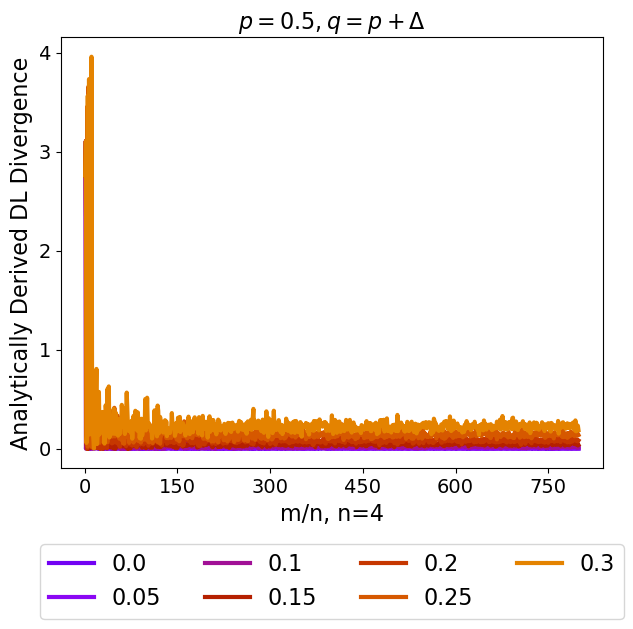

In [46]:
fontsize = 16
labelsize = 14
fig, ax = plt.subplots(figsize = (7,7))
cmap = [plt.cm.gnuplot(i) for i in np.linspace(0.2, 0.8, len(delta_list))]
for i, delta in enumerate(delta_list):
    ax.plot(m_list2, div_list2[i], c=cmap[i], lw=3, label=str(np.round(delta,2)))
ax.set_ylabel("Analytically Derived DL Divergence", fontsize = fontsize)
ax.set_xlabel("m/n, n=4", fontsize = fontsize)
ax.tick_params(axis='x', labelsize=labelsize)
ax.tick_params(axis='y', labelsize=labelsize)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.2,
                 box.width, box.height * 0.8])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, fontsize=fontsize, ncol=4)
ax.xaxis.set_major_locator(MaxNLocator(6))
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.set_title(r"$p = {}, q = p + \Delta$".format(p), fontsize=fontsize)